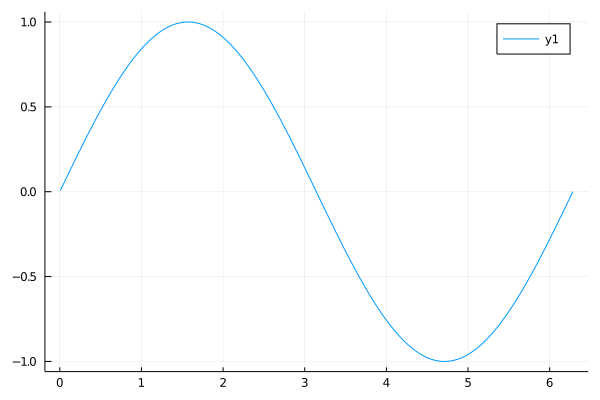

In [2]:
using Plots
# 定义数组
x=[1:1000]/1000.0*2.0*pi
# 转换数组
x=convert(Array{Float32},x[1])
# 计算sin函数
y=sin.(x)
# 画图
plot(x,y)

In [3]:
function f(x,y)
  x + y
end

f (generic function with 1 method)

In [4]:
f(3,5)

8